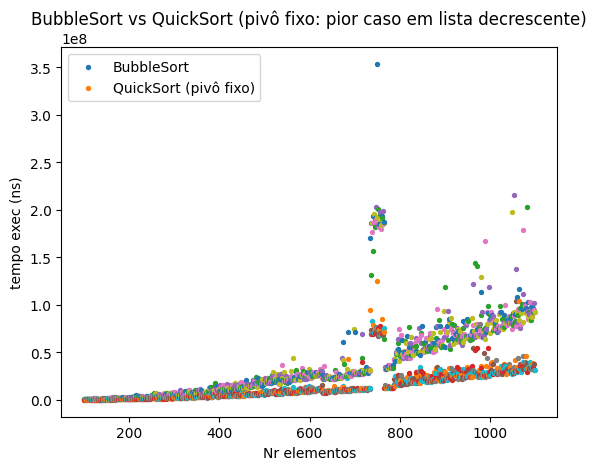

In [1]:
from random import randint
import time
import matplotlib.pyplot as plt
import numpy as np

def criaListaI(numero):
    lista = []
    for i in range(numero):
        lista.append(100 - i)
    return lista

def criaLista(numero):
    lista = []
    for i in range(numero):
        lista.append(randint(1, 50))
    return lista

def bubblesort(lista):
    tamanho = len(lista)
    for i in range(tamanho - 1):
        for j in range(tamanho - 1):
            if lista[j] > lista[j + 1]:
                lista[j], lista[j + 1] = lista[j + 1], lista[j]
    return lista


def _particiona(arr, low, high):
    pivot = arr[high]           
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr) - 1
    if low < high:
        p = _particiona(arr, low, high)
        quicksort(arr, low, p - 1)
        quicksort(arr, p + 1, high)
    return arr



tempos_bubble = []
tempos_quick = []

for i in range(1000):
    tamanho = 100 + i
    l = criaListaI(tamanho)  
    lb = l[:]                
    lq = l[:]                

    ini = time.time_ns()
    bubblesort(lb)
    fim = time.time_ns()
    tempos_bubble.append(fim - ini)

    ini = time.time_ns()
    quicksort(lq)
    fim = time.time_ns()
    tempos_quick.append(fim - ini)

    plt.scatter(tamanho, tempos_bubble[-1], s=8, label="BubbleSort" if i == 0 else "")
    plt.scatter(tamanho, tempos_quick[-1], s=8, label="QuickSort (pivô fixo)" if i == 0 else "")

plt.xlabel('Nr elementos')
plt.ylabel('tempo exec (ns)')
plt.legend()
plt.title('BubbleSort vs QuickSort (pivô fixo: pior caso em lista decrescente)')
plt.show()
